# COMP2200/COMP6200 Prac - Week 3

_Author: Benjamin Pope (benjamin.pope@mq.edu.au)_

---

In lectures this week we encountered ideas about data visualization, including histograms and scatter plots; and about distributions, including the normal distribution and the central limit theorem. 

Today we are going to explore the Monte Carlo method: using random numbers to estimate the properties of a distribution, and use this to illustrate some important distributions and the central limit theorem, and how to propagate uncertainties through calculations.

**Please submit the completed notebook for this workshop to your GitHub Classroom for marking!**

Remember that to use a notebook, you need to run each cell. If left side of a cell says `[ ]`, it hasn't been run. If the left side
says something like `[25]` then it has been. Shift-Enter runs a cell;  if you look around the user interface, various other menu items can run several cells in sequence.

In [7]:
import numpy as np # maths
import matplotlib.pyplot as plt # plotting

import pandas as pd # data manipulation
import seaborn as sns # plotting

The `numpy` and `scipy` libraries have many functions for generating random numbers (as do many packages in many languages). Let's become familiar with some of the common functions, and take a tour through some of the important distributions:

- `np.random.rand()` generates a random number between 0 and 1
    - this is used to model continuous data that is uniformly distributed
- `np.random.binomial(n, p)` generates a random number from a binomial distribution with parameters `n` and `p`
    - this is used to model yes/no events like coin flips, where `n` is the number of flips and `p` is the probability of heads
- `np.random.beta(a, b)` generates a random number from a beta distribution with parameters `a` and `b`
    - this is used to model probabilities, where `a` and `b` are the number of successes and failures
- `np.random.randn()` generates a random number from a standard normal distribution (mean 0, standard deviation 1)
    - this is used to model continuous data that is normally distributed

Pseudorandom numbers in computing are generated by deterministic algorithms, where the next step is the application of an equation to the previous step.

We need to set 

- a seed for the random number generator, so that we can reproduce the same results each time we run the code
- the number of random numbers we want to generate

In this part of the exercise, you want to 

- try out what these look like with different seeds, and 
- see how the histograms converge to a uniform distribution as the number of random numbers increases.

In [22]:
# first let's simulate some uniform data

np.random.seed(3) # set the seed - play with changing this 

n = 100 # number of samples

# generate some random data
x = np.random.rand(n)
print(x) 

[0.5507979  0.70814782 0.29090474 0.51082761 0.89294695 0.89629309
 0.12558531 0.20724288 0.0514672  0.44080984 0.02987621 0.45683322
 0.64914405 0.27848728 0.6762549  0.59086282 0.02398188 0.55885409
 0.25925245 0.4151012  0.28352508 0.69313792 0.44045372 0.15686774
 0.54464902 0.78031476 0.30636353 0.22195788 0.38797126 0.93638365
 0.97599542 0.67238368 0.90283411 0.84575087 0.37799404 0.09221701
 0.6534109  0.55784076 0.36156476 0.2250545  0.40651992 0.46894025
 0.26923558 0.29179277 0.4576864  0.86053391 0.5862529  0.28348786
 0.27797751 0.45462208 0.20541034 0.20137871 0.51403506 0.08722937
 0.48358553 0.36217621 0.70768662 0.74674622 0.69109292 0.68918041
 0.37360012 0.6681348  0.33984866 0.57279387 0.32580716 0.44514505
 0.06152893 0.24267542 0.97160261 0.2305842  0.69147751 0.65047686
 0.72393914 0.47508861 0.59666377 0.06696942 0.07256214 0.19897603
 0.151861   0.10010434 0.12929386 0.55327773 0.18781482 0.95210124
 0.68161178 0.54101967 0.7071806  0.26388667 0.92672568 0.8391

In the next cell, plot a time series of these random samples - are they correlated?

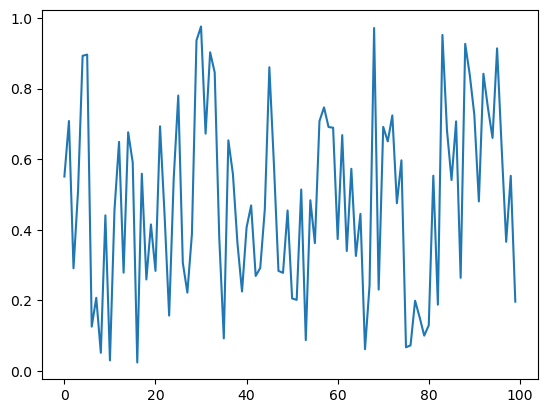

In [23]:
plt.plot(x)

In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt

Let's make a histogram:

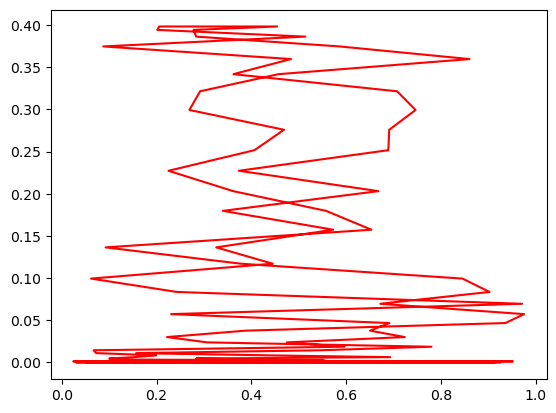

In [24]:
plt.plot(x, pdf, 'r-')

In [10]:
# Define x values
x = np.linspace(-5, 5, 100)  # Creates 100 points between -5 and 5


In [12]:
# Define pdf (example: Normal distribution)
pdf = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)


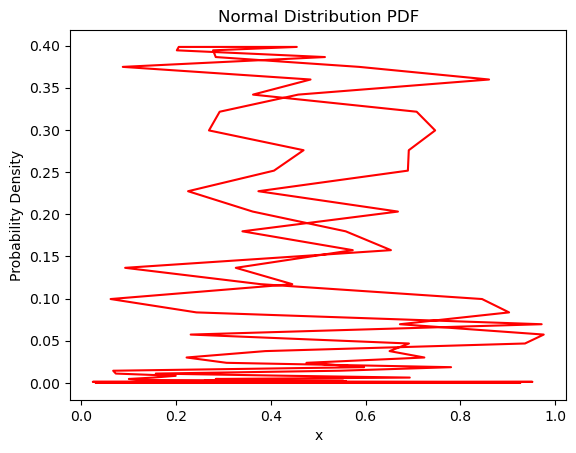

In [25]:
# Plot the function
plt.plot(x, pdf, 'r-')  # 'r-' means red line
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution PDF')
plt.show()

There is also a family of functions in `scipy.stats` for statistics, which can draw samples but also calculate probability densit functions (PDFs), cumulative distribution functions (CDFs), and more.

In [26]:
from scipy import stats

To generate samples, we use the `.rvs()` method, which stands for "random variates".

In [27]:
draws = stats.uniform.rvs(size=10, random_state=2) # see that with the same seed we get the same data as numpy
draws

array([0.4359949 , 0.02592623, 0.54966248, 0.43532239, 0.4203678 ,
       0.33033482, 0.20464863, 0.61927097, 0.29965467, 0.26682728])

In this section, edit this to show that as you increase the size of the draw, you approach the expected distribution more and more closely.

How big does the draw need to be for all bins to be within 1% of the expected value?

Answer: ...

(0.0, 2.0)

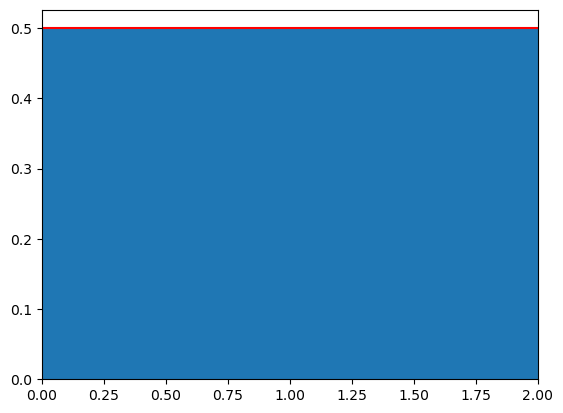

In [28]:
dist = stats.uniform(0,2) # scipy is object oriented, so we need to create an object to work with
draws = dist.rvs(size=1000000, random_state=3) # see that with the same seed we get the same data as numpy
x = np.linspace(0, 2, 1000)
pdf = dist.pdf(x) # probability density function

plt.hist(draws,density=True) # density=True normalizes the histogram
plt.plot(x, pdf, 'r-')
plt.xlim(0,2)

You can also calculate the *cumulative distribution function* (CDF) of the data, which is the probability that a random variable is less than or equal to a certain value. This is most vitally important for calculating p-values in hypothesis testing.

(0.0, 2.0)

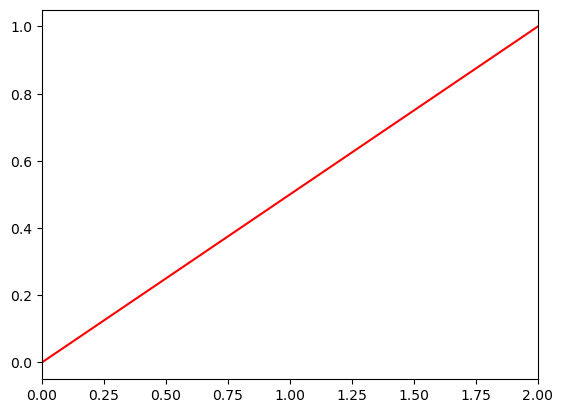

In [29]:
cdf = dist.cdf(x) # cumulative density function
plt.plot(x, cdf, 'r-')
plt.xlim(x.min(), x.max())

Let's consider a few other distributions:
- exponential 
- Poisson
- binomial

The exponential distribution represents the waiting time between discrete events that occur at random but at a constant average rate. 

This can represent

- bus arrival times
- radioactive decay
- shot noise in electronics or photon counting optics
- raindrops hitting a window

(0.0, 1.0)

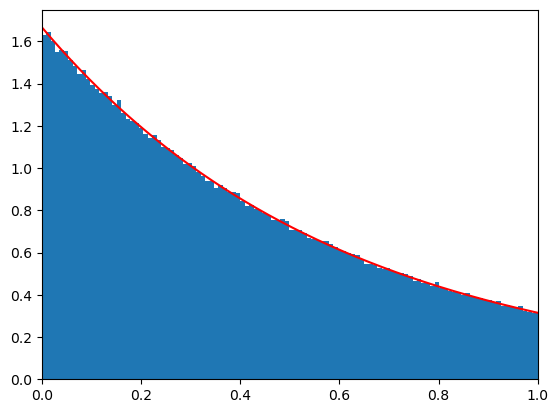

In [30]:
dist_exp = stats.expon(scale=0.6) # exponential distribution with scale=1
draws_exp = dist_exp.rvs(size=1000000, random_state=3) # see that with the same seed we get the same data as numpy
x = np.linspace(0, 1, 1000000)
pdf = dist_exp.pdf(x) # probability density function

plt.hist(draws_exp,density=True,bins=1000) # density=True normalizes the histogram
plt.plot(x, pdf, 'r-')
plt.xlim(0,1)


What does the CDF look like?

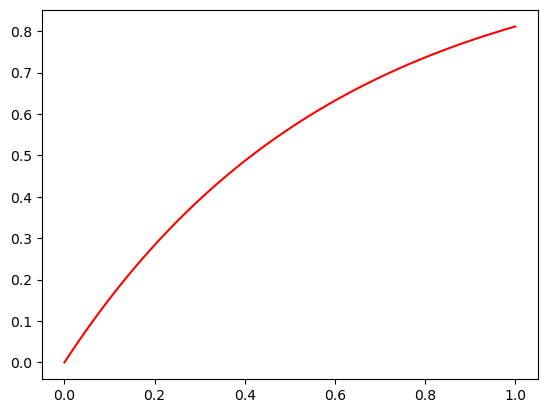

In [56]:
plt.plot(x, dist_exp.cdf(x), 'r-')

There is an amazing trick with CDFs: if you take the inverse of the CDF, you can generate random numbers from that distribution by looking up the value of the CDF at a random number between 0 and 1. You can do this with the `.ppf()` method, which stands for "percent point function" - this calculates what value the percentiles of the distribution correspond to.

This is how a lot of the functions in `scipy` generate random variates under the hood. This is called the *inverse transform method*. Let's try this:

(array([482., 278., 113.,  61.,  28.,  22.,   8.,   6.,   0.,   2.]),
 array([4.47480049e-04, 4.11283749e-01, 8.22120017e-01, 1.23295629e+00,
        1.64379255e+00, 2.05462882e+00, 2.46546509e+00, 2.87630136e+00,
        3.28713763e+00, 3.69797390e+00, 4.10881016e+00]),
 <BarContainer object of 10 artists>)

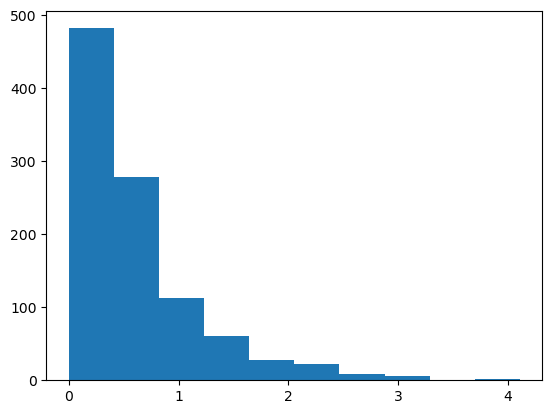

In [31]:
uniform_samples = np.random.rand(1000)
plt.hist(dist_exp.ppf(uniform_samples))

There are also convenience functions for calculating summary statistics like the mean and standard deviation exactly, without having to draw samples:

In [32]:
print("mean",dist_exp.mean(), "sigma",dist_exp.var())

mean 0.6 sigma 0.36


These are vectorized, so if you pass it a range of parameters, it will return a range of results. Let's plot this to see how the mean varies with $a$ and $b$:

In [34]:
a=np.linspace(0.1,5, 100) )
# Create an instance of the beta distribution object with 100 different PDFs
# where 'a' shape parameter varies from 0.1 to 5, while 'b' is fixed at 3
b = 3
dist_beta = stats.beta(a, b)

# Get the mean vector of the distribution
means = dist_beta.mean()

# Check the shape of the mean vector
print(means.shape)  # This output means we have 100 different mean values
# Plot the mean values against the shape parameter 'a' of the beta distribution
plt.plot(a, means)

SyntaxError: unmatched ')' (671934805.py, line 1)

In [35]:
# Set the range of random values
a = np.linspace(0.1, 5, 100)  # Removed the extra closing parenthesis

In [36]:
# Create an instance of the beta distribution object with 100 different PDFs
# where 'a' shape parameter varies from 0.1 to 5, while 'b' is fixed at 3
b = 3
dist_beta = stats.beta(a, b)


In [37]:

# Get the mean vector of the distribution
means = dist_beta.mean()

In [38]:
# Check the shape of the mean vector
print(means.shape) 


(100,)


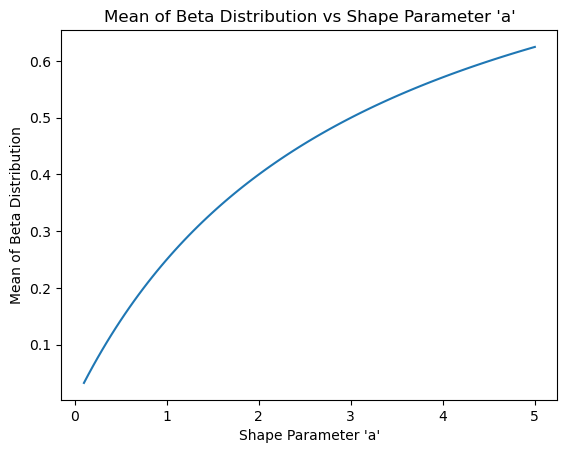

In [39]:
# Plot the mean values against the shape parameter 'a' of the beta distribution
plt.plot(a, means)
plt.xlabel("Shape Parameter 'a'")
plt.ylabel("Mean of Beta Distribution")
plt.title("Mean of Beta Distribution vs Shape Parameter 'a'")
plt.show()

In [ ]:
1.dist_beta=stats

In [16]:
np.linspace(0, 1, 100)

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [17]:
np.linspace(-5, 5, 20)

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [18]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

This is closely related to a discrete distribution: the Poisson distribution, which is the probability of getting a number of events arriving at random at a fixed rate called $\lambda$ or $\mu$ (ie like in the exponential distribution) *over a fixed interval of time*.

Play with the mean value: for small samples this is very lumpy and discrete, but for large count rates it is converging to something very familiar! 

Why do you think this is? 

*Answer*: The Poisson distribution describes the probability of a given number of events occurring in a fixed interval of time or space, assuming these events happen with a known constant mean rate (
𝜆)and independently of the time since the last event.
When 
𝜆 is small, Poisson is highly skewed and "lumpy," with a large probability of 𝑋=0 or small values.
As λ grows, the distribution smooths out and becomes bell-shaped.
This occurs because the sum of many independent random events (even if discrete) tends to follow a Normal distribution (CLT in action).


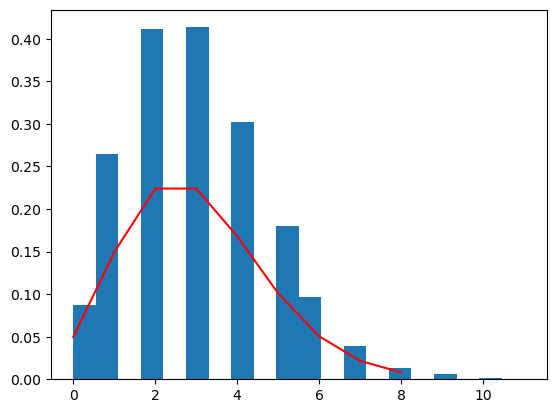

In [39]:
rate = 3
dist = stats.poisson(mu=rate) # poisson distribution with mu=3
draws = dist.rvs(size=10000, random_state=3) # see that with the same seed we get the same data as numpy
x = np.arange(0, np.round(rate*3))
pmf = dist.pmf(x) # probability mass function for discrete distributions

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pmf, 'r-')


In the next cell, plot how the mean and standard deviation of a Poisson distribution vary with the rate parameter $\lambda$.

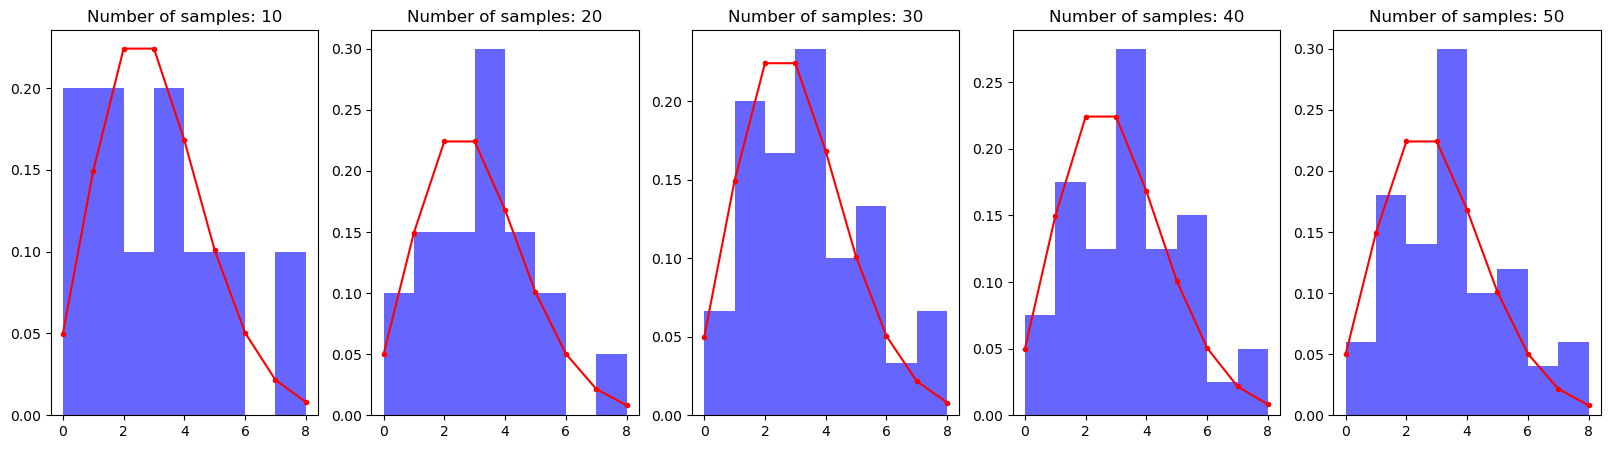

In [41]:
rate = 3  # Poisson distribution with mu=3
dist_poi = stats.poisson(mu=rate)  

fig, ax = plt.subplots(1, 5, figsize=(20, 5))  # Create a figure with 5 subplots

# Loop to visualize Poisson distribution for different sample sizes
for times_index in range(0, 5):
    draws = dist_poi.rvs(size=10 * (times_index + 1), random_state=3)  # Draw samples from Poisson distribution
    
    x = np.arange(0, np.round(rate * 3))  # Define x-axis range
    pmf = dist_poi.pmf(x)  # Compute probability mass function (PMF)

    ax[times_index].hist(draws, bins=x, density=True, alpha=0.6, color='b')  # Plot histogram of samples
    ax[times_index].plot(x, pmf, 'r.-')  # Overlay the PMF curve
    ax[times_index].set_title(f"Number of samples: {10 * (times_index + 1)}")  # Set title for each subplot

plt.show()  # Show the plot

BONUS QUESTION: Can you show numerically that the Poisson distribution is the distribution of the number of events in a fixed interval of time if the events are exponentially distributed in time?

In [ ]:
Answer:

There are many more distributions implemented in `scipy.stats`, but one of the most important is the binomial distribution, which is the probability of getting $k$ successes in $n$ trials, each with probability $p$ of success. This models the number of heads in $n$ coin flips ($p=0.5$), or ($p = 1/6$) the number of times a die comes up 6 in $n$ rolls.

Check how this varies with $n$ and $p$. You'll notice that for small $n$ this is very blocky - but for large $n$ it is converging to something very familiar! 

Why do you think this is? 

*Answer*: ...

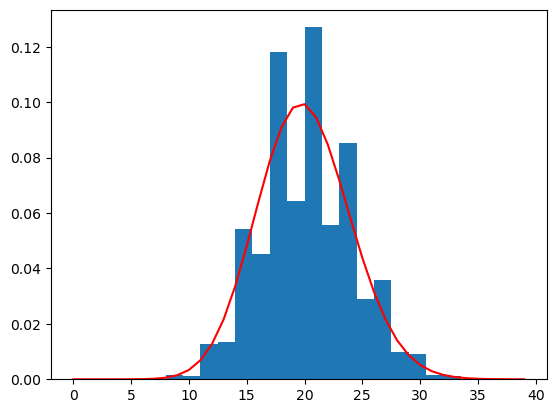

In [41]:
n, p = 100, 0.2
dist = stats.binom(n=n, p=p) # binomial distribution with n trials and p probability
draws = dist.rvs(size=10000, random_state=3) 
x = np.arange(0, np.max([np.round(n*p*2),np.max(draws)]))
pmf = dist.pmf(x) # probability mass function = probability density function for discrete distributions

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pmf, 'r-')


In the next cell, plot how the mean and standard deviation of a binomial distribution vary with the number of trials $n$ for some different values of $p$ of your choice.

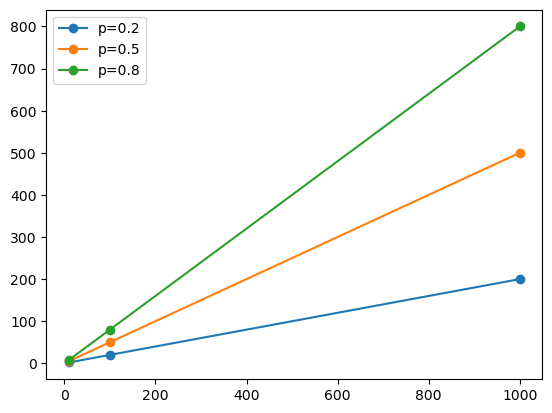

In [40]:
ns = [10, 100, 1000]
ps = [0.2, 0.5, 0.8]

for p in ps:
    dist = stats.binom(n=ns, p=p) # binomial distribution with n trials and p probability
    plt.plot(ns, dist.mean(), 'o-', label=f'p={p}')
plt.legend()

## The Central Limit Theorem

In class we talked about the central limit theorem: the sum of a large number of independent random variables is approximately normally distributed, and that you have mean and standard deviation 

$$
\mu = N \times \mu_0, \quad \sigma = \sqrt{N} \times \sigma_0
$$

The previous sections showed that this comes naturally out of large samples from Poisson or binomial distributions. 

Here's how we can draw from normal distributions:

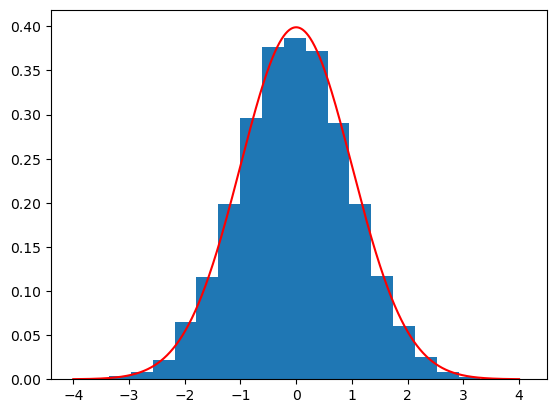

In [42]:
mu, sig = 0, 1
dist = stats.norm(mu, sig) # normal distribution with mean=0 and sigma=1
draws = dist.rvs(size=10000, random_state=3) 
x = np.linspace(mu-4*sig, mu+4*sig, 1000)
pdf = dist.pdf(x) # probability mass function = probability density function for discrete distributions

plt.hist(draws,density=True,bins=20) # density=True normalizes the histogram
plt.plot(x, pdf, 'r-')



In the next cell, use the analytic distribution means and variances to demonstrate the central limit theorem holds for:

- sum of N draws from uniform distributions
- sum of N draws frmo exponential distributions
- sum of N draws from uniform  and M draws from exponential distributions

and quantify how big N and M need to be for the central limit theorem to hold.

In [42]:
num_samples = 1000
N=100
M=50
#Sum of N draws from uniform distribution(0,1)
uniform_draws = stats.uniform.rvs(size=(num_samples,N), random_state=3)
uniform_sum = np.sum(uniform_draws, axis=1)
uniform_std=np.stats.uniform.mean()
uniform_std=np.sqrt(N.stats.uniform.var())

AttributeError: module 'numpy' has no attribute 'stats'

In [43]:
a, b = 0, 1  # Bounds of uniform distribution U(a, b)
uniform_mean = (a + b) / 2  # Mean of U(a, b)
uniform_var = ((b - a) ** 2) / 12  # Variance of U(a, b)
uniform_std = np.sqrt(uniform_var)  # Standard deviation

In [44]:
import numpy as np
import scipy.stats as stats


In [45]:
N = 30  # Sample size
num_samples = 10000  # Number of trials

# Generate random samples from Uniform(0,1)
uniform_draws = stats.uniform.rvs(size=(num_samples, N), random_state=3)
uniform_sum = np.sum(uniform_draws, axis=1)


In [46]:
# Correct way to compute mean and std
a, b = 0, 1  # Uniform(0,1)
uniform_mean = (a + b) / 2  # Mean
uniform_var = ((b - a) ** 2) / 12  # Variance
uniform_std = np.sqrt(uniform_var)  # Standard deviation


In [47]:
# Print results
print(f"Expected Mean: {N * uniform_mean}")
print(f"Expected Standard Deviation: {np.sqrt(N * uniform_var)}")

Expected Mean: 15.0
Expected Standard Deviation: 1.5811388300841898


One *vitally important* use for the normal distribution is in hypothesis testing - so the cumulative distribution function of the normal has a special name, the error function, and is implemented in `scipy.special`.

The error function is the integral of the normal distribution, and is used to calculate the probability that a random variable is within a certain range. In particular, everybody in stats will use $1\sigma$, $2\sigma$, and $3\sigma$ intervals as quantiles.

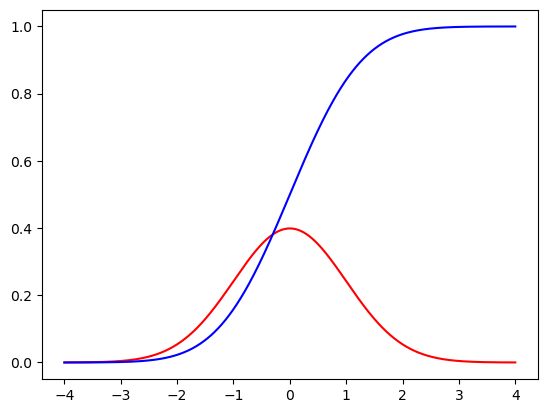

In [43]:
mu, sig = 0, 1
dist = stats.norm(mu, sig) # normal distribution with mean=0 and sigma=1

x = np.linspace(mu-4*sig, mu+4*sig, 1000)
pdf = dist.pdf(x) # probability mass function = probability density function for discrete distributions
cdf = dist.cdf(x) # cumulative density function
plt.plot(x, pdf, 'r-')
plt.plot(x, cdf, 'b-')

In the next cell, calculate the 1, 2, 3, 4, 5 $\sigma$ quantiles for a normal distribution. How frequent are "5-sigma" events?

In [48]:
# Define sigma levels
sigma_values = [1, 2, 3, 4, 5]

# Compute probability contained within ±σ range for a standard normal distribution
quantiles = {sigma: stats.norm.cdf(sigma) - stats.norm.cdf(-sigma) for sigma in sigma_values}

# Compute probability of events occurring outside ±σ range
outside_probs = {sigma: (1 - q) for sigma, q in quantiles.items()}

# Store results in a DataFrame
sigma_df = pd.DataFrame({
    "Sigma Level (±σ)": sigma_values,
    "Probability Contained (%)": [q * 100 for q in quantiles.values()],
    "Probability Outside (%)": [(1 - q) * 100 for q in quantiles.values()]
})

In [49]:
# Display the DataFrame
from IPython.display import display
print(sigma_df)

   Sigma Level (±σ)  Probability Contained (%)  Probability Outside (%)
0                 1                  68.268949                31.731051
1                 2                  95.449974                 4.550026
2                 3                  99.730020                 0.269980
3                 4                  99.993666                 0.006334
4                 5                  99.999943                 0.000057


## Multivariate Distributions

We can also consider multivariate distributions, where we have more than one random variable. Let's consider the multivariate normal, in 2D.

(np.float64(-3.195330262765032),
 np.float64(2.955704978626009),
 np.float64(-2.647944798940449),
 np.float64(2.387010967818698))

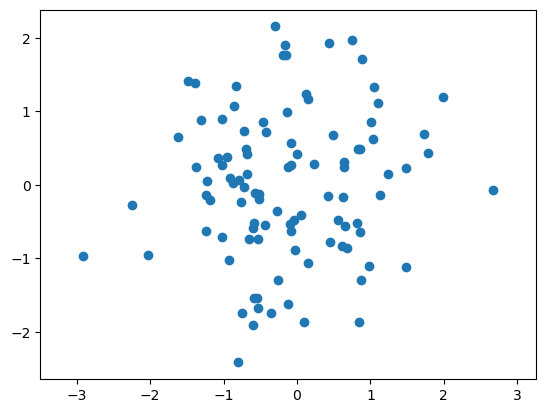

In [46]:
mu = [0, 0]
cov = [[1, 0], [0, 1]]
dist = stats.multivariate_normal(mean=mu, cov=cov)
draws = dist.rvs(size=100, random_state=3)

plt.scatter(draws[:,0],draws[:,1])
plt.axis('equal')

We can make this into a `pd` dataframe and plot it as a corner plot:

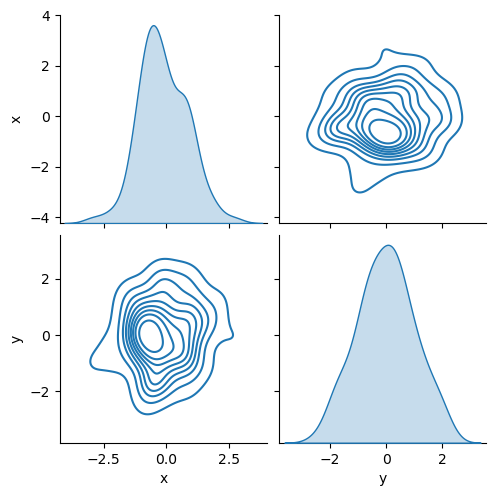

In [47]:
df = pd.DataFrame(draws, columns=['x', 'y'])
sns.pairplot(df, kind='kde') # play with this - try kind='scatter', 'kde', or 'hist'

In the above we have a few different options for the pairplot. In the markdown below, say why you might prefer one over another.

- `kind='scatter'`:
    - good for small data sets
- `kind='hist'`:
    - good for medium sized data sets 
- `kind='kde'`:
    - good for smoothing large data sets, but slow

That expression `cov` is called the *covariance matrix*, and it describes how the two variables are correlated. The diagonal terms of that matrix are the *marginal* variances of the two variables, and the off-diagonal terms are the *covariance* between the two variables. The matrix is always symmetric, and can be written in terms of a correlation coefficient $\rho$:

$$
\text{cov} = \begin{pmatrix} \sigma_1^2 & \rho \sigma_1 \sigma_2 \\ \rho \sigma_1 \sigma_2 & \sigma_2^2 \end{pmatrix}
$$

where $\rho$ is the correlation coefficient, which is always between -1 and 1.

In the next cell, explore 

- what does a multivariate normal look like for $\rho \in (-1, 0.5, 0, 0.5, 1)$?
- how big does the sample have to be to make the correlation apparent?

How do different multivariate distributions look? Visualize a few of these, like the uniform distribution:

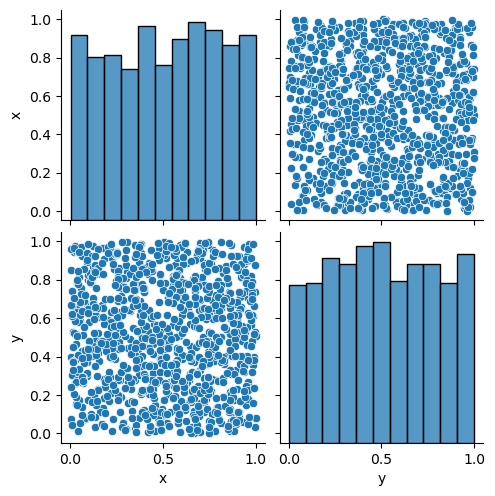

In [48]:
x, y = np.random.rand(2, 1000)
df = pd.DataFrame({'x': x, 'y': y})
sns.pairplot(df)

## Optional Hard Question

If a distribution doesn't have a finite mean and variance, like the Cauchy distriution, the central limit theorem doesn't hold. This is alarmingly common in the real world: so-called "heavy-tailed" distributions are everywhere, from the sizes of earthquakes to the sizes of cities, and you must be aware of them!

What does this look like? You might like to explore what the draws from a Cauchy (or, google it: other heavy-tailed distributions) look like, and how the central limit theorem fails.